In [70]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate original XOR dataset for MLP models
n = 400
x_original = np.random.rand(n, 2)
x1_condition = x_original[:, 0] > 0.5
x2_condition = x_original[:, 1] > 0.5
xor = np.logical_xor(x1_condition, x2_condition)

# Create tensors for original data
X_original = torch.tensor(x_original, dtype=torch.float32)
Y = torch.tensor(xor, dtype=torch.float32).unsqueeze(1)

X_train_original, X_test_original, Y_train, Y_test = train_test_split(X_original, Y, test_size=0.5, random_state=42)

# Create additional features for logistic regression
x1, x2 = x_original[:, 0], x_original[:, 1]
x_additional = np.column_stack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
X_additional = torch.tensor(x_additional, dtype=torch.float32)

X_train_additional, X_test_additional, _, _ = train_test_split(X_additional, Y, test_size=0.5, random_state=42)

In [71]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

mlp = MLP()

In [72]:
class MLP_L1(nn.Module):
    def __init__(self, l1_penalty=0.01):
        super(MLP_L1, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 1)
        self.activation = nn.ReLU()
        self.l1_penalty = l1_penalty

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

    def l1_loss(self):
      l1_norm = 0.0
      for param in self.parameters():
          l1_norm += torch.sum(torch.abs(param))
      return self.l1_penalty * l1_norm

mlp_l1 = MLP_L1(l1_penalty = 0.01)

In [73]:
class MLP_L2(nn.Module):
    def __init__(self, l2_penalty=0.01):
        super(MLP_L2, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 1)
        self.activation = nn.ReLU()
        self.l2_penalty = l2_penalty

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x


    def l2_loss(self):
      l2_norm = 0
      for para in self.parameters():
        l2_norm += torch.sum(para ** 2)
        return self.l2_penalty * l2_norm

mlp_l2 = MLP_L2(l2_penalty = 0.01)

In [74]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.fc = nn.Linear(5, 1)  #5 input features (original + engineered) [x1, x2, x1*x2, x1**2, x2**2]

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

logistic_model = LogisticRegression()

In [84]:
def train_mlp(model, X_train, Y_train, epochs=1000, learning_rate=0.01):
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    losses = []
    for epoch in range(epochs):
        # Forward pass
        y_pred = model(X_train)
        loss = criterion(y_pred, Y_train)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if epoch % 100 == 0:
            print(f'Basic MLP - Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')
    return losses

In [76]:
def train_mlp_l1(model, X_train, Y_train, epochs=1000, learning_rate=0.01):
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    losses = []
    for epoch in range(epochs):
        # Forward pass
        y_pred = model(X_train)

        # Calculate loss with L1 regularization
        base_loss = criterion(y_pred, Y_train)
        l1_loss = model.l1_loss()
        loss = base_loss + l1_loss

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if epoch % 100 == 0:
            print(f'MLP L1 - Epoch [{epoch}/{epochs}], Total Loss: {loss.item():.4f}, Base Loss: {base_loss.item():.4f}, L1 Loss: {l1_loss.item():.4f}')

    return losses

In [77]:
# Training function for MLP with L2 regularization
def train_mlp_l2(model, X_train, Y_train, epochs=1000, learning_rate=0.01):
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    losses = []
    for epoch in range(epochs):
        # Forward pass
        y_pred = model(X_train)

        # Calculate loss with L2 regularization
        base_loss = criterion(y_pred, Y_train)
        l2_loss = model.l2_loss()
        loss = base_loss + l2_loss

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if epoch % 100 == 0:
            print(f'MLP L2 - Epoch [{epoch}/{epochs}], Total Loss: {loss.item():.4f}, Base Loss: {base_loss.item():.4f}, L2 Loss: {l2_loss.item():.4f}')

    return losses

In [78]:
# Training function for Logistic Regression
def train_logistic(model, X_train, Y_train, epochs=1000, learning_rate=0.01):
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    losses = []
    for epoch in range(epochs):
        # Forward pass
        y_pred = model(X_train)
        loss = criterion(y_pred, Y_train)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if epoch % 100 == 0:
            print(f'Logistic Regression - Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')

    return losses

Training Basic MLP...
Basic MLP - Epoch [0/1000], Loss: 0.6847
Basic MLP - Epoch [100/1000], Loss: 0.3619
Basic MLP - Epoch [200/1000], Loss: 0.1574
Basic MLP - Epoch [300/1000], Loss: 0.0998
Basic MLP - Epoch [400/1000], Loss: 0.0724
Basic MLP - Epoch [500/1000], Loss: 0.0561
Basic MLP - Epoch [600/1000], Loss: 0.0453
Basic MLP - Epoch [700/1000], Loss: 0.0375
Basic MLP - Epoch [800/1000], Loss: 0.0317
Basic MLP - Epoch [900/1000], Loss: 0.0273

Training MLP with L1 regularization...
MLP L1 - Epoch [0/1000], Total Loss: 0.7973, Base Loss: 0.6882, L1 Loss: 0.1091
MLP L1 - Epoch [100/1000], Total Loss: 0.6886, Base Loss: 0.6861, L1 Loss: 0.0025
MLP L1 - Epoch [200/1000], Total Loss: 0.6886, Base Loss: 0.6861, L1 Loss: 0.0024
MLP L1 - Epoch [300/1000], Total Loss: 0.6885, Base Loss: 0.6861, L1 Loss: 0.0024
MLP L1 - Epoch [400/1000], Total Loss: 0.6887, Base Loss: 0.6861, L1 Loss: 0.0025
MLP L1 - Epoch [500/1000], Total Loss: 0.6886, Base Loss: 0.6861, L1 Loss: 0.0025
MLP L1 - Epoch [600/

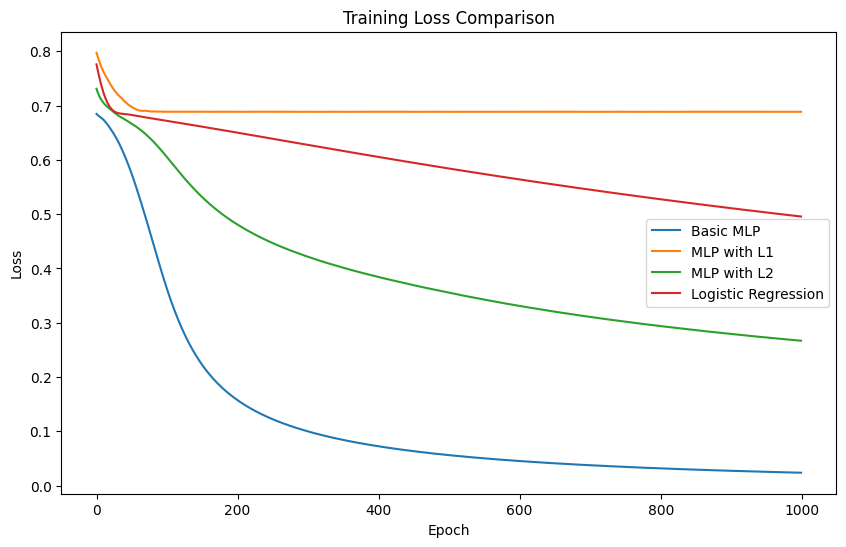

In [79]:
print("Training Basic MLP...")
losses_mlp = train_mlp(mlp, X_train_original, Y_train)

print("\nTraining MLP with L1 regularization...")
losses_mlp_l1 = train_mlp_l1(mlp_l1, X_train_original, Y_train)

print("\nTraining MLP with L2 regularization...")
losses_mlp_l2 = train_mlp_l2(mlp_l2, X_train_original, Y_train)

print("\nTraining Logistic Regression...")
losses_logistic = train_logistic(logistic_model, X_train_additional, Y_train)

# Plot training losses
plt.figure(figsize=(10, 6))
plt.plot(losses_mlp, label='Basic MLP')
plt.plot(losses_mlp_l1, label='MLP with L1')
plt.plot(losses_mlp_l2, label='MLP with L2')
plt.plot(losses_logistic, label='Logistic Regression')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.show()

In [86]:
# Calculate and print accuracies
def calculate_accuracy(model, X, Y):
    with torch.no_grad():
        y_pred = model(X)
        predicted = (y_pred > 0.5).float()
        acc = (predicted == Y).float().mean()
        return acc.item()

print("\nTest Accuracies:")
print(f"Basic MLP: {calculate_accuracy(mlp, X_test_original, Y_test):.4f}")
print(f"MLP with L1: {calculate_accuracy(mlp_l1, X_test_original, Y_test):.4f}")
print(f"MLP with L2: {calculate_accuracy(mlp_l2, X_test_original, Y_test):.4f}")
print(f"Logistic Regression: {calculate_accuracy(logistic_model, X_test_additional, Y_test):.4f}")


Test Accuracies:
Basic MLP: 0.9700
MLP with L1: 0.5450
MLP with L2: 0.9400
Logistic Regression: 0.7750


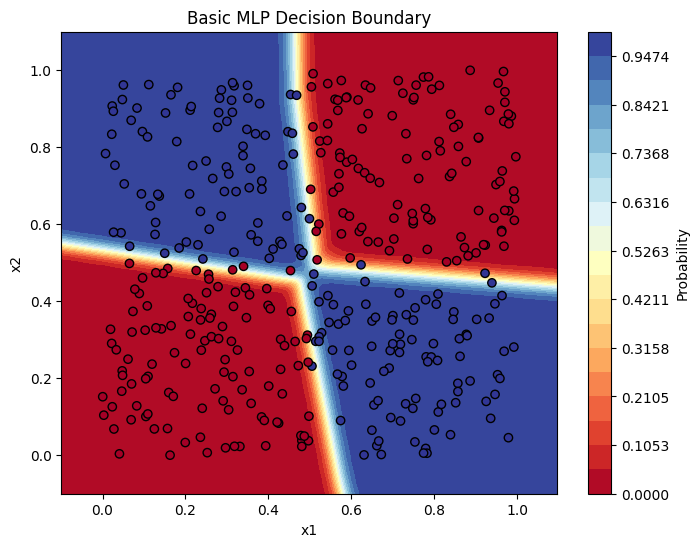

In [96]:
# Plot decision boundaries
def plot_decision_boundary(model, X, y, title, is_logistic=False):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    # Prepare mesh data
    if is_logistic:
        X_mesh = np.c_[xx.ravel(), yy.ravel()]
        x1_mesh, x2_mesh = X_mesh[:, 0], X_mesh[:, 1]
        X_mesh = np.column_stack((
            x1_mesh, x2_mesh,
            x1_mesh * x2_mesh,
            x1_mesh ** 2,
            x2_mesh ** 2
        ))
    else:
        X_mesh = np.c_[xx.ravel(), yy.ravel()]

    # Make predictions
    X_mesh_tensor = torch.FloatTensor(X_mesh)
    Z = model(X_mesh_tensor)
    Z = Z.detach().numpy()
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, levels=np.linspace(0, 1, 20), cmap='RdYlBu')
    plt.colorbar(label='Probability')

    # Plot training points
# Replace 'edcolors' with 'edgecolors'
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap='RdYlBu',
                     edgecolors='black', linewidth=1) # Changed 'edcolors' to 'edgecolors'
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    return plt

# Plot decision boundaries for all models
plot_decision_boundary(mlp, x_original, Y.numpy(), 'Basic MLP Decision Boundary')
plt.show()

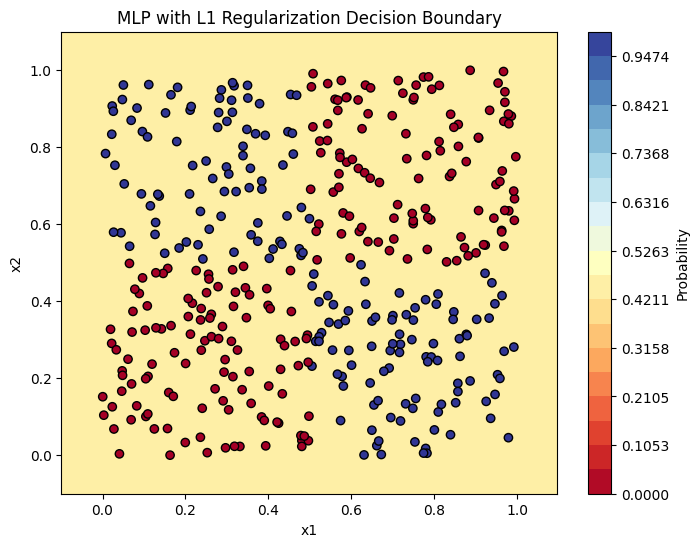

In [97]:
plot_decision_boundary(mlp_l1, x_original, Y.numpy(), 'MLP with L1 Regularization Decision Boundary')
plt.show()

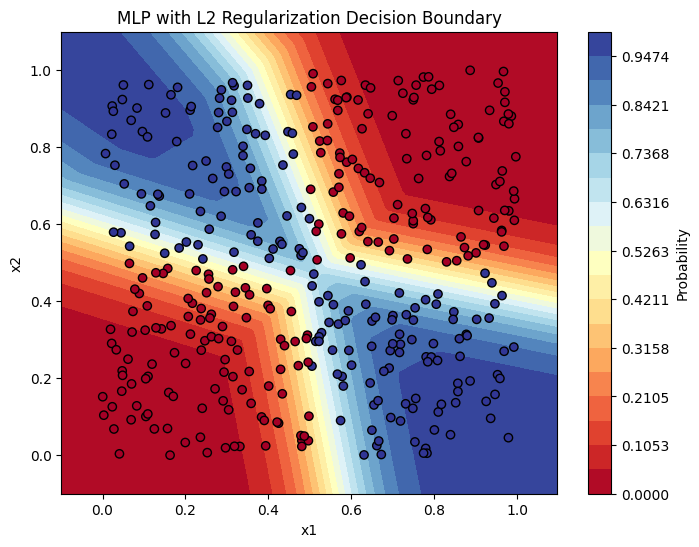

In [98]:
plot_decision_boundary(mlp_l2, x_original, Y.numpy(), 'MLP with L2 Regularization Decision Boundary')
plt.show()

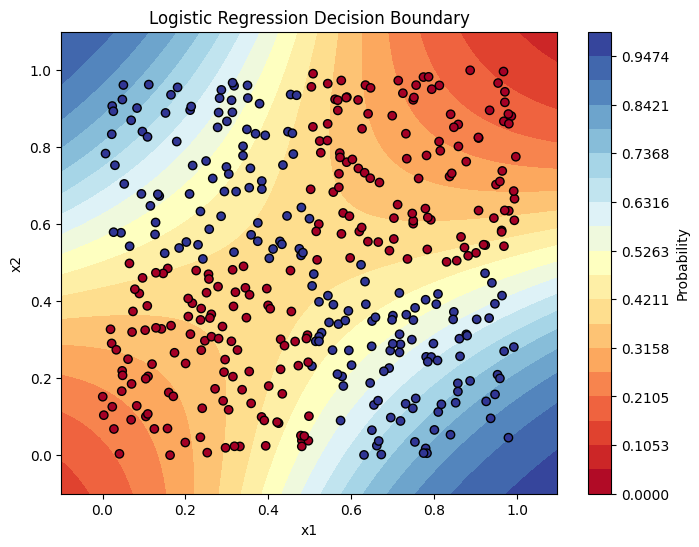

In [99]:
plot_decision_boundary(logistic_model, x_original, Y.numpy(), 'Logistic Regression Decision Boundary', True)
plt.show()